# TASK 1


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

# Load Dataset
data = pd.read_csv(r"C:\Users\SMART TECH\Desktop\AppliedNLPMaterial-master\phone Dataset\train.csv")
 


# Task 1: Univariate Selection (Chi-Square Test)

In [27]:
X = data.drop("price_range", axis=1)
y = data.price_range
X_non_negative = X[X.columns[(X > -1).all()]]

In [29]:
selector = SelectKBest(score_func = chi2, k=10)
X_new = selector.fit_transform(X_non_negative, y)
selected_features = X_non_negative.columns[selector.get_support()]  # Get selected feature names
print("Top 10 selected features using Chi-Square Test:")
print(selected_features)

Top 10 selected features using Chi-Square Test:
Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')


# Task 2: Feature Importance using Extra Trees Classifier

In [35]:
model = ExtraTreesClassifier()
model.fit(X,Y)
feature_importances = pd.Series(model.feature_importances_, index = X.columns

#### Plot fig instances

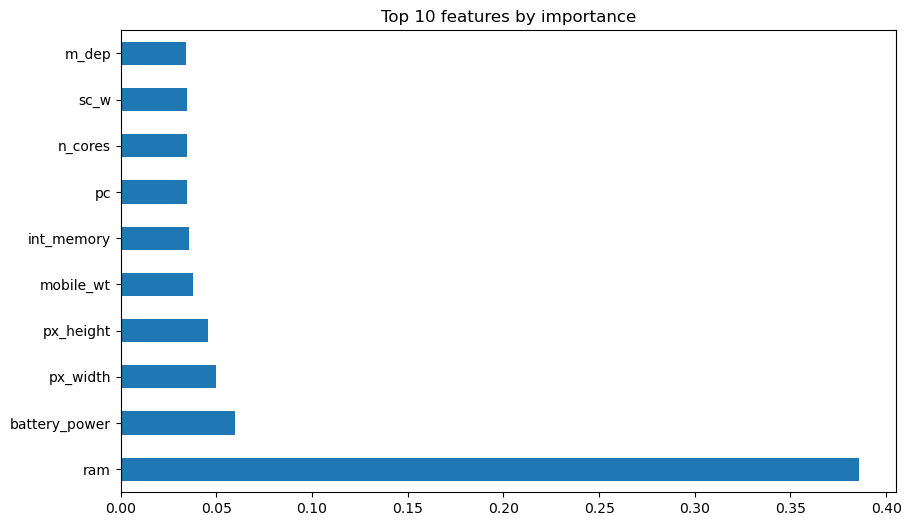

In [45]:
plt.figure(figsize=(10,6))
feature_importances.nlargest(10).plot(kind="barh")
plt.title("Top 10 features by importance")
plt.show()

# Task 3: Correlation Matrix with Heatmap

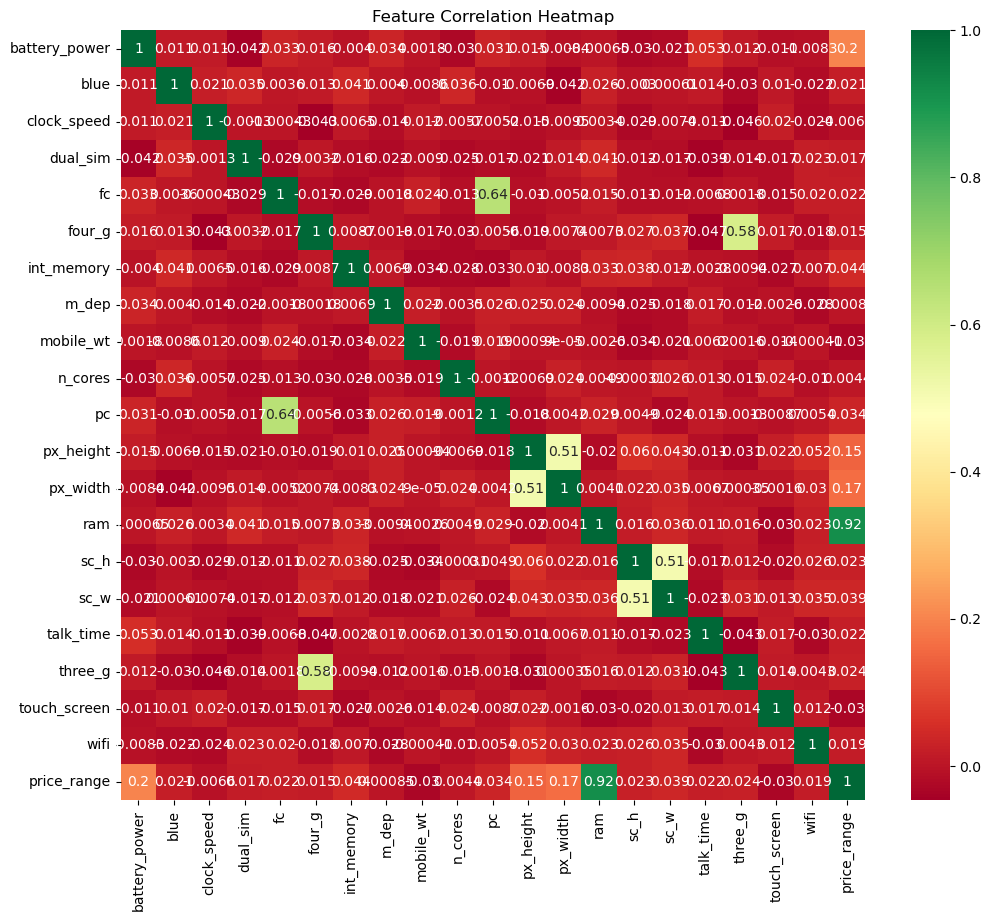

In [57]:
corrmat = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap( corrmat, annot= True ,  cmap="RdYlGn")
plt.title("Feature Correlation Heatmap")
plt.show()